In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**INITIALIZING THE WORKSPACE**

In [ ]:
ls

drive/  sample_data/


In [5]:
cd /content/drive/MyDrive/Anna_University/IBM/Assignments

/content/drive/MyDrive/Anna_University/IBM/Assignments


In [ ]:
pwd

'/content/drive/MyDrive/CNN'

**EXTRACTING THE ZIP FILE**

In [6]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

**IMAGE AUGMENTATION**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

**SPLITTING THE DATASET INTO TRAINING TESTING AND VALIDATION**

In [11]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import splitfolders

In [13]:
input_folder = './flowers/'

In [14]:
splitfolders.ratio(input_folder,output="flowers2",seed=42,ratio=(.7,.2,.1),group_prefix=None)

Copying files: 4317 files [00:54, 79.58 files/s]


**LOADING THE TRAINING DATA**

In [15]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Anna_University/IBM/Assignments/flowers2/train",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 3019 images belonging to 5 classes.


**LOADING THE TESTING DATA**

In [16]:
x_test=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Anna_University/IBM/Assignments/flowers2/val",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 860 images belonging to 5 classes.


In [17]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# CNN

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten

### Creating Model

In [20]:
model=Sequential()

### Adding Layers

In [21]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(300,activation="relu"))

In [24]:
model.add(Dense(300,activation="relu"))

In [25]:
model.add(Dense(5,activation="softmax"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 300)               36902700  
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 36,995,401
Trainable params: 36,995,401
Non-trainable params: 0
_________________________________________________________________


### Compling The Model

In [27]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

### Model Fitting

In [28]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
126/126 [==============================] - 73s 572ms/step - loss: 1.9684 - accuracy: 0.4200 - val_loss: 1.1805 - val_accuracy: 0.4884
Epoch 2/10
126/126 [==============================] - 66s 520ms/step - loss: 1.1310 - accuracy: 0.5489 - val_loss: 1.1049 - val_accuracy: 0.5535
Epoch 3/10
126/126 [==============================] - 64s 510ms/step - loss: 1.0875 - accuracy: 0.5760 - val_loss: 1.0874 - val_accuracy: 0.5721
Epoch 4/10
126/126 [==============================] - 66s 524ms/step - loss: 1.0062 - accuracy: 0.6058 - val_loss: 0.9874 - val_accuracy: 0.5907
Epoch 5/10
126/126 [==============================] - 65s 515ms/step - loss: 0.9625 - accuracy: 0.6284 - val_loss: 1.0078 - val_accuracy: 0.6012
Epoch 6/10
126/126 [==============================] - 65s 517ms/step - loss: 0.9207 - accuracy: 0.6505 - val_loss: 0.9842 - val_accuracy: 0.6128
Epoch 7/10
126/126 [==============================] - 65s 517ms/step - loss: 0.8960 - accuracy: 0.6545 - val_loss: 0.9075 - val_ac

### Saving The Model

In [29]:
model.save('flowers.h5')

### Testing The Model

In [30]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

### LOADING THE MODEL

In [31]:
model=load_model('flowers.h5')

In [42]:
img=image.load_img(r"/content/drive/MyDrive/Anna_University/IBM/Assignments/flowers2/test/sunflower/12471443383_b71e7a7480_m.jpg")

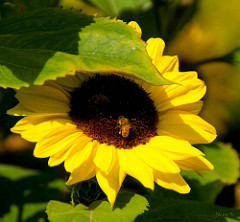

In [43]:
img

In [44]:
img=image.load_img(r"/content/drive/MyDrive/Anna_University/IBM/Assignments/flowers2/test/sunflower/12471443383_b71e7a7480_m.jpg",target_size=(64,64))

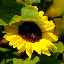

In [45]:
img

In [46]:
x=image.img_to_array(img)

In [47]:
x

array([[[  1.,  19.,   3.],
        [  6.,  24.,   0.],
        [ 19.,  31.,   0.],
        ...,
        [161., 142.,   1.],
        [168., 147.,   2.],
        [168., 147.,   2.]],

       [[  3.,  23.,   0.],
        [ 25.,  42.,   0.],
        [ 39.,  41.,   1.],
        ...,
        [164., 143.,   0.],
        [167., 146.,   1.],
        [166., 145.,   0.]],

       [[  0.,  19.,   0.],
        [  4.,  27.,   0.],
        [ 12.,  30.,   4.],
        ...,
        [160., 141.,   0.],
        [165., 144.,   3.],
        [166., 145.,   2.]],

       ...,

       [[  0.,  13.,   3.],
        [ 14.,  31.,   0.],
        [ 49.,  72.,   0.],
        ...,
        [ 35.,  58.,  16.],
        [ 27.,  45.,   3.],
        [ 25.,  48.,   0.]],

       [[  7.,  20.,   0.],
        [ 64.,  91.,   0.],
        [ 77., 106.,   0.],
        ...,
        [ 26.,  49.,   0.],
        [ 33.,  49.,  10.],
        [ 50.,  69.,   3.]],

       [[ 63.,  89.,   2.],
        [ 88., 112.,   0.],
        [ 83., 1

In [48]:
x=np.expand_dims(x,axis=0)

In [49]:
pred=model.predict(x)

In [50]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [51]:
index[np.argmax(pred)]

'sunflower'